<a href="https://colab.research.google.com/github/jacks-li/T13-CHL5230-F23-DT1/blob/main/Datathon_1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **CHL5230 Datathon 1 - Team 13**

**Topic: Public Health Factors Influencing BMI**

**Team Members:** Gemma Postill, Rebecca Lee, Jack Li

---

**Research Question**

1. Are there distinct subtypes of obesity influenced by lifestyle factors?
2. What modifiable risk factors of obesity are present within each subtype, identifying groups for targeted public health intervention?

---

**Analysis Plan**

To determine how risk factors of BMI cluster together and create distinct obesity phenotypes, we will use unsupervised machine learning.

- Filter data to only include BMI ≥ 30.0 (obese)
- Remove non-modifiable factors influencing BMI (age, gender)
- Use KMeans clustering and determine optimal number of clusters using elbow method.
- Split the data into testing and training to develop and evaluate our model.
- Use F1 scores, recall, and precision to evaluate how our clusters perform on the testing data.
- Conduct a descriptive analysis of the clusters to determine the modifiable and non-modifiable risk factors within each group.


In [8]:
import pandas as pd
import io

# Read the dataset into a Pandas DataFrame
# Uploaded dataset as part of notebook, no need to upload
df = pd.read_csv("CHL5230-F23-Datathon #1-Dataset1.csv")

# Display the first few rows of the dataset to ensure it's loaded correctly
df.head()

,Age,Gender,Calorie_Intake,Sugar_Intake,Physical_Activity,Fast_Food_Frequency,Screen_Time,Height,Weight,BMI
0,56,Female,3091,90,160,4,1,1.569070,81.199394,32.981343
1,69,Female,2090,106,27,0,9,1.629449,74.273566,27.973877
2,46,Male,2938,11,45,2,3,1.637726,71.453466,26.640417
3,32,Female,3022,48,112,1,8,1.514198,98.163045,42.813720
4,60,Female,2350,83,115,0,7,1.410559,57.323914,28.810685


In [42]:
# For adults 20 and older, adults with BMI >= 30.0 are considered obsese (https://www.cdc.gov/healthyweight/assessing/bmi/adult_bmi/index.html)

#print (df.columns)


# Filtering data to only include age >= 20.
df = df.loc[(df["Age"]>=20)]

# assign weight class Obese: 0, Overweight: 1, Normal: 2, Under:3
def assign_weight_class(bmi):
  if bmi >=30:
   return 0
  elif bmi >=25:
   return 1
  elif bmi >=18.5:
   return 2
  else:
   return 3

df['WeightClass'] = df['BMI'].apply(assign_weight_class)


# Removing non-modifiable factors: Age, Gender
modifiable_subset = df[['Calorie_Intake', 'Sugar_Intake', 'Physical_Activity', 'Fast_Food_Frequency', 'Screen_Time', 'Height', 'Weight', 'BMI', 'WeightClass']]

modifiable_subset



,Calorie_Intake,Sugar_Intake,Physical_Activity,Fast_Food_Frequency,Screen_Time,Height,Weight,BMI,WeightClass
0,3091,90,160,4,1,1.569070,81.199394,32.981343,0
1,2090,106,27,0,9,1.629449,74.273566,27.973877,1
2,2938,11,45,2,3,1.637726,71.453466,26.640417,1
3,3022,48,112,1,8,1.514198,98.163045,42.813720,0
4,2350,83,115,0,7,1.410559,57.323914,28.810685,1
...,...,...,...,...,...,...,...,...,...
23530,2858,65,37,1,9,1.774514,56.917788,18.075460,3
23531,2573,27,27,1,1,1.677173,57.277270,20.362283,2
23532,2246,37,44,0,3,1.661042,80.314959,29.109537,1
23533,1588,24,101,4,7,1.577156,43.365424,17.433880,3


/usr/local/lib/python3.10/dist-packages/sklearn/neighbors/_classification.py:215: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)


[[513 291 342  43]
 [574 314 338  48]
 [660 347 421  65]
 [272 138 174  19]]
              precision    recall  f1-score   support

           0       0.25      0.43      0.32      1189
           1       0.29      0.25      0.27      1274
           2       0.33      0.28      0.30      1493
           3       0.11      0.03      0.05       603

    accuracy                           0.28      4559
   macro avg       0.25      0.25      0.23      4559
weighted avg       0.27      0.28      0.26      4559



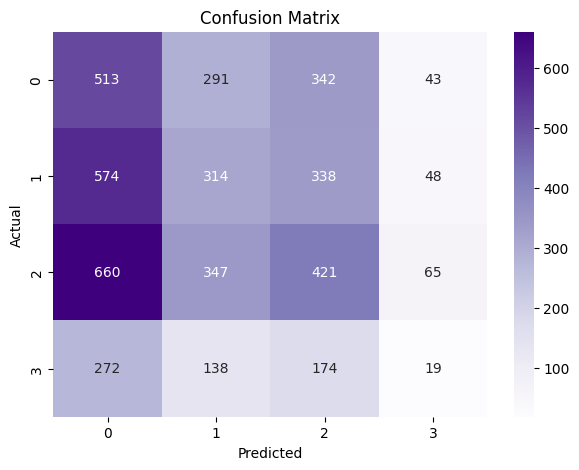

In [65]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import classification_report, confusion_matrix

# Split data into features and label
X = modifiable_subset[['Calorie_Intake', 'Sugar_Intake', 'Physical_Activity', 'Fast_Food_Frequency', 'Screen_Time']] #add or subtract any features from list
y = modifiable_subset[['WeightClass']]

# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Scale the features
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Apply KNN
knn = KNeighborsClassifier(n_neighbors=3)  # Setting K to 5 as an example
knn.fit(X_train, y_train)

# Predict using the test data
y_pred = knn.predict(X_test)

# Evaluate the model
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))

import seaborn as sns
import matplotlib.pyplot as plt

# Get unique classes
classes = modifiable_subset['WeightClass'].unique()

# Plotting the confusion matrix
plt.figure(figsize=(7,5))
sns.heatmap(confusion_matrix(y_test, y_pred, labels=classes), cmap='Purples', annot=True, fmt='g', xticklabels=classes, yticklabels=classes)
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()